#### Importing necessary libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score


#### Load the dataset

In [2]:
data = pd.read_csv('LoanApprovalPrediction.csv')

In [4]:
#checking Data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [7]:
#checking for null Values
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [9]:
data.duplicated().sum()

0

#### Data Preprocessing

# Data cleaning
- Drop loan_ID, not required for analysis
- Replace null values with mean or most frequent
- convert catogerical values into numeric

In [10]:
#Drop loan_ID, not required for analysis
data.drop(columns=["Loan_ID"], inplace = True)



In [11]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [13]:
#Replace null values with mean or most frequent

from sklearn.impute import SimpleImputer

# Imputer for categorical data (most frequent value)
cat_imputer = SimpleImputer(strategy="most_frequent")

# Imputer for numerical data (mean value)
num_imputer = SimpleImputer(strategy="mean")

In [15]:
# For the numerical columns, reshape them into 2D arrays and apply the imputer
data["LoanAmount"] = num_imputer.fit_transform(data[["LoanAmount"]])
data["Loan_Amount_Term"] = num_imputer.fit_transform(data[["Loan_Amount_Term"]])
data["Credit_History"] = num_imputer.fit_transform(data[["Credit_History"]])


#For the catagerical columns
data["Dependents"] = cat_imputer.fit_transform(data[["Dependents"]])



In [16]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [17]:
#convert catogerical values into numeric

from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

In [23]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


In [22]:
data["Gender"] = Le.fit_transform(data["Gender"])
data["Married"] = Le.fit_transform(data["Married"])
data["Education"] = Le.fit_transform(data["Education"])
data["Self_Employed"] = Le.fit_transform(data["Self_Employed"])
data["Property_Area"] = Le.fit_transform(data["Property_Area"])
data["Loan_Status"] = Le.fit_transform(data["Loan_Status"])

#### EDA

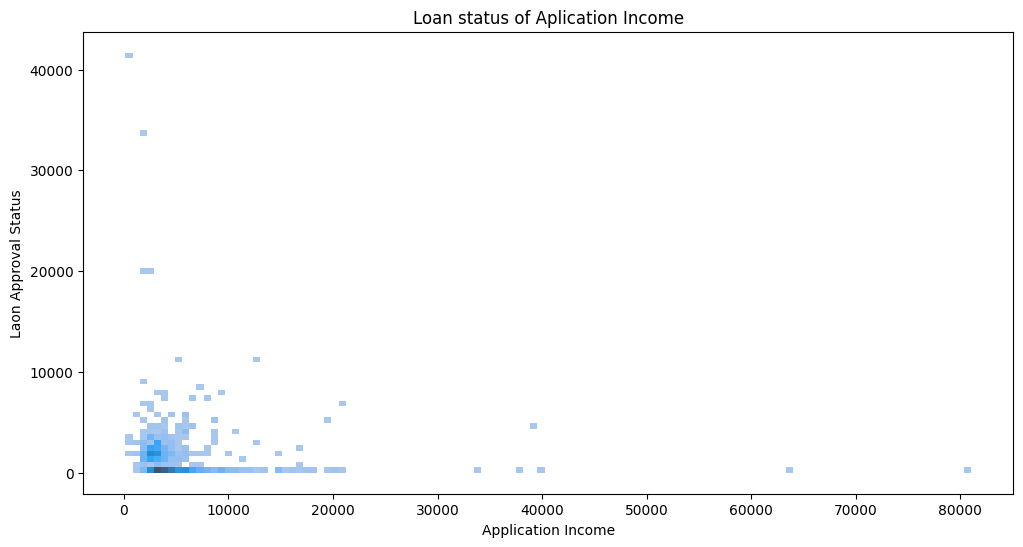

In [27]:
#Histogram
plt.figure(figsize=(12,6))
sns.histplot(x="ApplicantIncome", y="CoapplicantIncome", data=data)
plt.title("Loan status of Aplication Income")
plt.xlabel("Application Income")
plt.ylabel("Laon Approval Status")
plt.show()

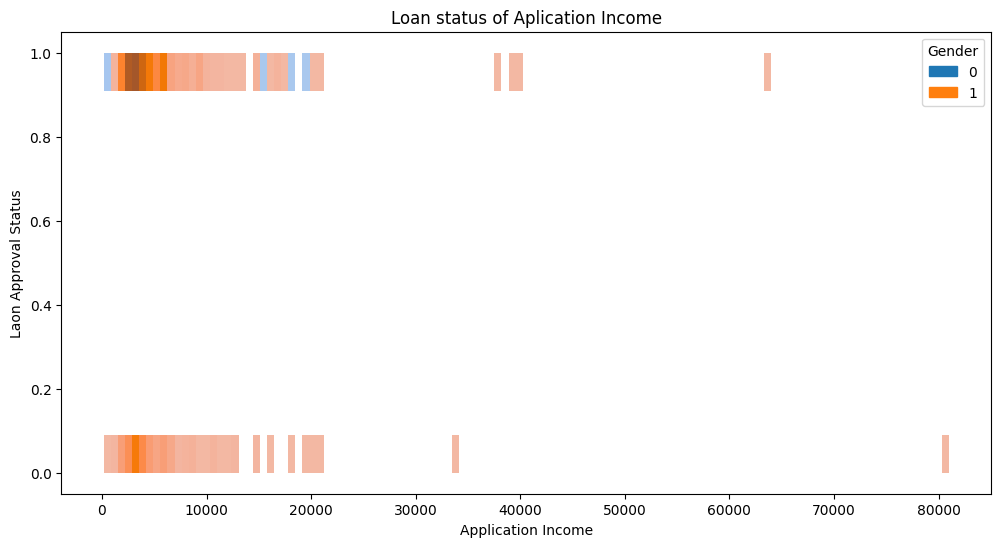

In [28]:
#Histogram
plt.figure(figsize=(12,6))
sns.histplot(x="ApplicantIncome", y="Loan_Status", hue="Gender", data=data)
plt.title("Loan status of Aplication Income")
plt.xlabel("Application Income")
plt.ylabel("Laon Approval Status")
plt.show()

### Model Selction and Builing

In [36]:
#Splitting data into variables - Dependent and independent
x=data.drop(['Loan_Status'],axis=1) #independent variables
y=data['Loan_Status'] #dependent variable



In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.82)

#### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [51]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_hat=model.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_hat)
print(ac)

conf_matrix = confusion_matrix(y_test,y_hat)
print(conf_matrix)

prec_score = precision_score(y_test,y_hat)
print(prec_score)

0.8796296296296297
[[16 12]
 [ 1 79]]
0.8681318681318682
